# Worldometer - World population evolution and projections
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/Worldometer/Worldometer_World_population_evolution_and_projections.ipynb" target="_parent">
<img src="https://img.shields.io/badge/-Open%20in%20Naas-success?labelColor=000000&logo="/>
</a>

In [13]:
import pandas as pd
import plotly.express as px
from bs4 import BeautifulSoup
import requests

## Data to scrap tables

In [14]:
DATA_URLS = ["https://www.worldometers.info/world-population/world-population-by-year/",
    "https://www.worldometers.info/world-population/world-population-projections/"
    ]

TABLE_COLS = ['Year',
    'World Population',
    'YearlyChange',
    'NetChange',
    'Density(P/Km²)',
    'UrbanPop',
    'UrbanPop %']

## Functions to scrap tables on several sites, and merge them

In [15]:
# Generic functions

def scrap_table(url, table_cloumns):
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    dfs = pd.read_html(page.text)

    for df in dfs:
        if df.columns.to_list() == table_cloumns:
            return df
    return None

def merge_tables_from_urls(urls, table_columns):
    table = None
    for url in urls:
        new_value = scrap_table(url, table_columns)
        if new_value is not None:
            if table is None:
                table = new_value
            else:
                table = table.append(new_value)
    return table

## Print table

In [16]:
table

,Year,World Population,YearlyChange,NetChange,Density(P/Km²),UrbanPop,UrbanPop %
80,2100,10874902318,0.03 %,3090840.0,73.0,N.A,N.A.
79,2099,10871811478,0.04 %,3917630.0,73.0,N.A,N.A.
78,2098,10867893848,0.04 %,4714410.0,73.0,N.A,N.A.
77,2097,10863179438,0.05 %,5485189.0,73.0,N.A,N.A.
76,2096,10857694249,0.06 %,6233652.0,73.0,N.A,N.A.
...,...,...,...,...,...,...,...
89,-1000,50000000,NaN,NaN,NaN,NaN,NaN
90,-2000,27000000,NaN,NaN,NaN,NaN,NaN
91,-3000,14000000,NaN,NaN,NaN,NaN,NaN
92,-4000,7000000,NaN,NaN,NaN,NaN,NaN


## Create function to display graph

In [17]:
def create_graph(x_label, y_label, table, title="", graph_type=px.line):
    fig = graph_type(table, x=x_label, y=y_label, title=title)
    fig.show()

In [18]:
# Print population graph from year to year
def display_population_graph(table, x_from=None, x_to=None, graph_type=px.line):
    x_label = TABLE_COLS[0]
    y_label = TABLE_COLS[1]
    if x_from is not None:
        table = table[table.Year >= x_from]
    if x_to is not None:
        table = table[table.Year <= x_to]
    title = f"{y_label} by {x_label}, between {table[x_label].to_list()[-1]} and {table[x_label].to_list()[0]}"
    create_graph(x_label, y_label, table, title, graph_type)

## Fetch tables, sort the result and remove duplicate data

In [19]:
table = merge_tables_from_urls(DATA_URLS, TABLE_COLS)

table = table.sort_values(by=[TABLE_COLS[0]], ascending=False)

table.drop_duplicates(subset=TABLE_COLS[0], keep="first", inplace=True)

## Display the graph between -5000 and 2100

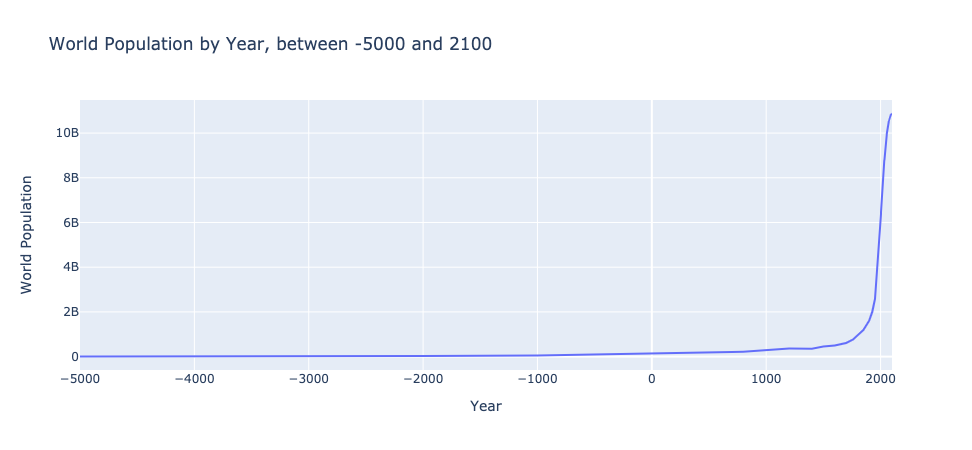

In [27]:
chart1 = display_population_graph(table)

## Display the graph between 1800 and 2020

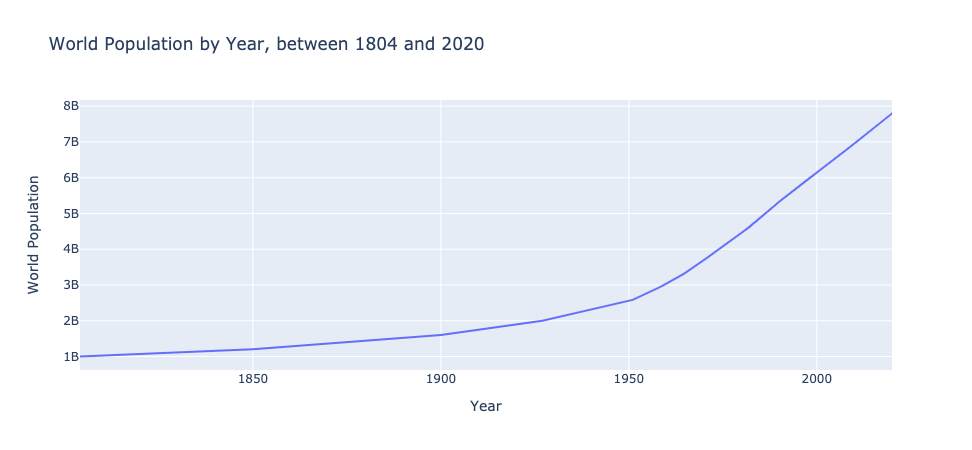

In [21]:
display_population_graph(table, x_from=1800, x_to=2020)

## Display the graph between 2000 and 2100

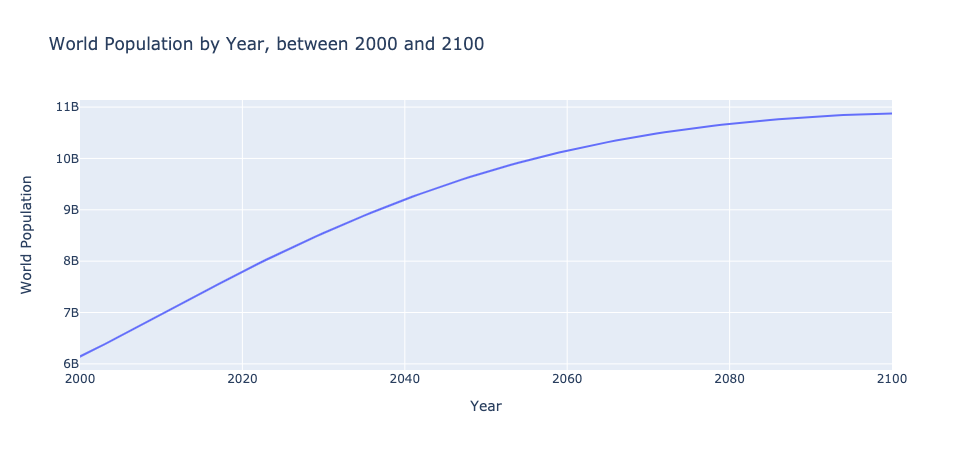

In [22]:
display_population_graph(table, x_from=2000, x_to=2100)

## Display a barchart between 2000 and 2100 

The graph type can be change by passing a graph function as 'graph_type' (graph_type=px.line, etc)

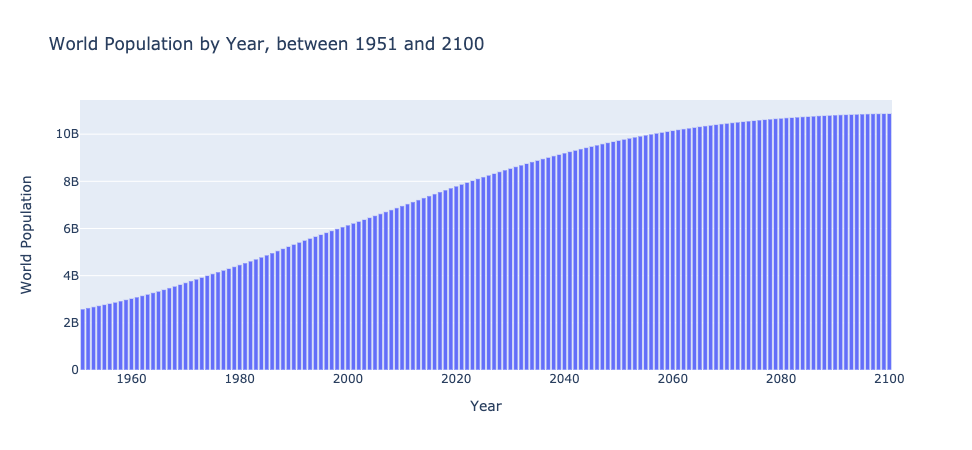

In [23]:
display_population_graph(table, x_from=1950, x_to=2100, graph_type=px.bar)